In [9]:
import pandas as pd

ruta = "C:/Users/PC/Downloads/DATA-PRUEBA_CALIFICACIONES  2017-2020-UNMSM (2).xlsx"

calificaciones = pd.read_excel(ruta, sheet_name=None)

In [10]:
calificaciones = pd.concat(calificaciones, ignore_index=True)
calificaciones = calificaciones.drop(["Unnamed: 7", "Unnamed: 8","Unnamed: 9","Unnamed: 10"], axis=1)

In [18]:
calificaciones.dtypes

cod_semestre          object
cod_facultad          object
cod_escuela           object
cod_plan              object
cod_asignatura        object
cod_alumno            object
val_calific_final    float64
dtype: object

In [17]:
calificaciones = calificaciones.astype({
    "cod_semestre":"str",
    "cod_facultad":"str",
    "cod_escuela":"str"
})

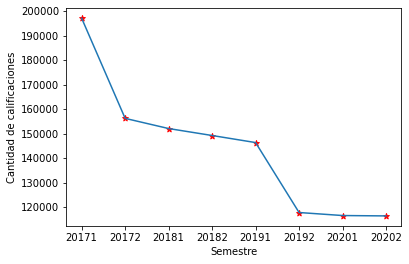

In [142]:
import matplotlib.pyplot as plt
import numpy as np

semestres = calificaciones["cod_semestre"].unique()
numero_calificaciones = calificaciones["cod_semestre"].value_counts()

plt.scatter(semestres,numero_calificaciones, marker="*", color="red")
plt.plot(semestres, numero_calificaciones)

plt.xlabel("Semestre")
plt.ylabel("Cantidad de calificaciones")

plt.show() 


In [143]:
calificaciones.head()

,cod_semestre,cod_facultad,cod_escuela,cod_plan,cod_asignatura,cod_alumno,val_calific_final
0,20171,1,1,2004,MH0440,14010029,16.0
1,20171,1,1,2004,MH0440,14010276,16.0
2,20171,1,1,2004,MH0440,13010237,15.0
3,20171,1,1,2004,MH0440,13010241,15.0
4,20171,1,1,2004,MH0440,12010327,13.0


In [144]:
#filtro_20171 = calificaciones["cod_semestre"] == "20171"
#num_20171=len(calificaciones[filtro_20171]["cod_alumno"].unique())
numero_alumnos_por_semestre=[]
for semestre in semestres:
    print(semestre)
    filtro = calificaciones["cod_semestre"] == semestre
    num=len(calificaciones[filtro]["cod_alumno"].unique())
    numero_alumnos_por_semestre.append(num)

20171
20172
20181
20182
20191
20192
20201
20202


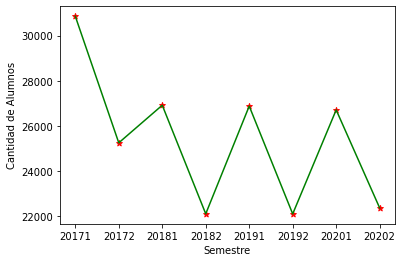

In [149]:
plt.scatter(semestres,numero_alumnos_por_semestre, marker="*", color="red")
plt.plot(semestres,numero_alumnos_por_semestre, color="green")

plt.xlabel("Semestre")
plt.ylabel("Cantidad de Alumnos")

plt.show() 

In [177]:
ju=calificaciones[calificaciones["cod_semestre"] == "20171"]
ju[["val_calific_final"]].mean()

val_calific_final    13.205061
dtype: float64

In [178]:
prom_sem = calificaciones[["cod_semestre","val_calific_final"]]
promedio_semestre=[]
for semestre in semestres:
    c = prom_sem[prom_sem["cod_semestre"] == semestre]
    promedio=c[["val_calific_final"]].mean()
    promedio_semestre.append(promedio)

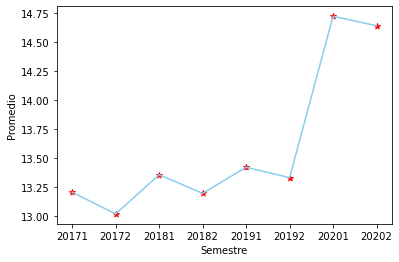

In [181]:
plt.scatter(semestres,promedio_semestre, marker="*", color="red")
plt.plot(semestres,promedio_semestre, color="skyblue")

plt.xlabel("Semestre")
plt.ylabel("Promedio")

plt.show() 